# Getting Started With SQL and BigQuery

**1. Introduction**

Structured Query Language, or SQL, is the programming language used with databases, and it is an important skill for any data scientist. In this course, you'll build your SQL skills using BigQuery, a web service that lets you apply SQL to huge datasets. 

In this lesson, you'll learn the basic of accessing and examining BigQuery datasets. After you have a handle on these basics, we'll come back to build your SQL skills. 

**2. Your first BigQuery commands**

To use BigQuery, we'll import the Python package below : 

In [19]:
from google.cloud import bigquery

The first step in the workflow is to create a 'Client' object. A you'll soon see, this 'Client' object will play a central role in retrieving information from BigQuery datasets.

In [20]:
# Create a "Client" object

client = bigquery.Client()

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

We'll work with a dataset of posts on Hacker News, a website focusing on computer science and cybersecurity news. In BigQuery, each dataset is contained in a corresponding project. In this case, our hacker_news dataset is contained in the bigquery-public-data project. To access the dataset,

- We begin by constructing a reference to the dataset with the dataset() method.
- Next, we use the get_dataset() method, along with the reference we just constructed, to fetch the dataset.

In [ ]:
# Construct a reference to the "hacker_news" dataset

dataset_ref = client.dataset("hacker_news", project = "bigquery-public-data")

# APi request - fetch the dataset

dataset = client.get_dataset(dataset_ref)

Every dataset is just a collection of tables. You can think of a dataset as a spreadsheet file containing multiple tables, all composed of rows and columns. 

We use the list_tables() method to list the tables in the dataset.

In [ ]:
# List all the tables in the "hacker_news" dataset

tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)

for table in tables : 
    print(table.table_id)

Similar to how we fetched a dataset, we can fetch a table. In the code cell below, we fetch the 'full' table in the hacker_news dataset.

In [ ]:
# Construct a reference to the "full" table

table_ref = dataset_ref.table("full")

# API reqeust - fetch the table

table = client.get_table(table_ref)

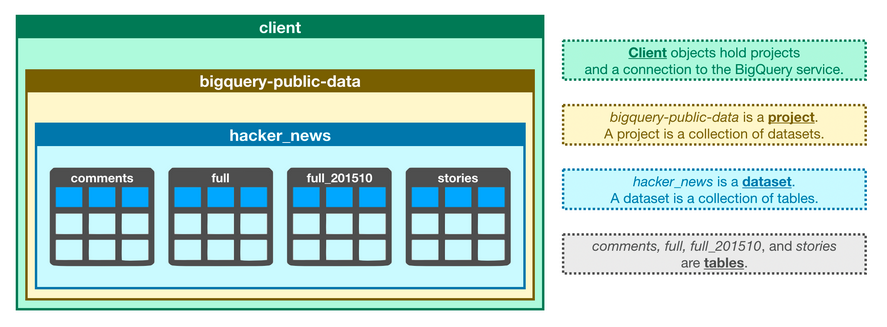

**3. Table Schema**

The structure of a table is called its schema. We need to understand a table's schema to effectively pull out the data we want.

In [ ]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset

table.schema

Each 'SchemaField' tells us about a specific column (which we also refer to as a field). In order, the information is : 

- The name of the column
- The field type (or datatype) in the column
- The mode of the column ('NULLABLE' means that a column allows NULL values, and is the default)
- A description of the data in that column

The first field has the SchemaField: 

- SchemaField('by', 'string', 'NULLABLE', 'THe username of the item's author.', ())

THis tells us : 

- The field (or column) is called 'by', 
- The data in this field is strings,
- NULL values are allowed, and 
- it contains the usernames corresponding to each item's author.

We can use the list_rows() method to check just the first five lines of the full table to make sure this is right. (Sometimes databases have outdated descriptions, so it's good to check.) This returns a BigQuery RowIterator object that can quickly be converted to a pandas DataFrame with the to_dataframe() method.

In [ ]:
# Preview the first five lines of  the "full" table.

client.list_rows(table, max_results = 5).to_dataframe()

The list_rows() method will also let us look at just the information in a specific column. If we want to see the first five entries in the by column, for example, we can do that!

In [ ]:
# Preview the first fie entries in the "by" column of the "full" table.

client.list_rows(table, selected_fields = table.shcema[:1], max_results=5).to_dataframe()

# Select, From & Where

**1. Introduction**

Now that you know how to access and examine a dataset, you're ready to write your first SQL query! As you'll soon see, SQL queries will help you sort through a massive dataset, to retrieve only the information that you need.

We'll begin by using the keywords SELECT, FROM, and WHERE to get data from specific columns based on conditions you specify. 

For clarity, we'll work with a small imagineary dataset pet_records which contains jsut one table, called pets.

| ID | Name | Animal | 
| --- | --- | --- | 
| 1 | Dr. Haris Bonkers | Rabbit | 
| 2 | Moon | Dog | 
| 3 | Ripley | Cat | 
| 4 | Tom | Cat | 

**2. SELECT ... FROM**

The most basic SQL query selects a single columns from a single table. To do this, 

- specify the column you want after the word SELECT, and then
- specify the table after the word FROM

For instance, to select the Name column (from the pets table in the pet_recods database in the bigquery-public-data project), our query would appear as follows :  

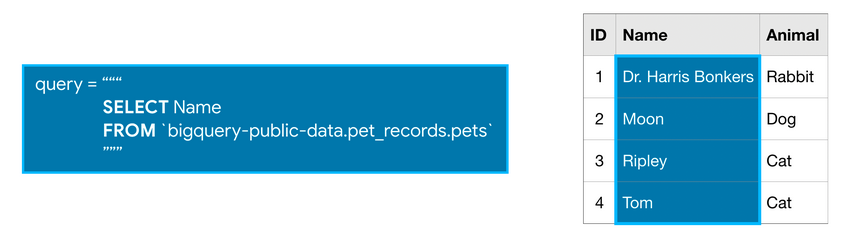

Note that when writing an SQL query, the argument we pass to FROm is not in single or double quotation mask("or"). it is in backticks(').

**3. WHERE ...**

BigQuery datasets are large, so you'll usually want to return only the rows meeting specific conditions. You can do this using the WHERE clause.

The query below return the entries from the Name column that are in rows where the Animal column has the text 'Cat'.

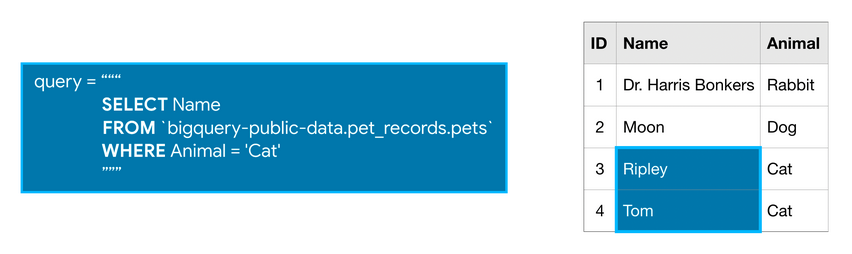

In [ ]:
# Example : What are the U.S. cities in the OpenAQ dataset? 

from google.cloud import bigquery

# Creat a "Client" object

client = bigquery.Client()

# Construct a reference to the "openaq" dataset

dataset_ref = client.dataset("openaq", project = "bigquery-public-data")

# API request - fetch the dataset

dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset

tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset

for table in tables
    print(table.table_id)
    
# Construct a reference to the "global_air_quality" table

table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table

table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table

client.list_rows(table, max_results = 5).to_dataframe()



In [ ]:
# Query to select all the items from the "city" columns where the "country" column in 'US'

query = """
        SELECT city
        FROM 'bigquery-public-data.openaq.global_air_quality'
        WHERE country = 'US'
        """

**3. Submitting the query to the dataset**

We're ready to use this query to get information from the OpenAQ dataset. As in the pervious tutorial, the first step is to creat a Client object.

We begin by setting up the query with the query() method. We run the method with the default parameters, but this method also allows us to specify more complicated settings that you can read about in the documentation. We'll revisit this later.

In [1]:
# Creat a "Clinet" object

client = bigquery.Client()

# Set up the query

query_job = client.query(query)

# API request - run the query, and return a pandas DataFrame

us_cities = query_job.to_dataframe()

NameError: name 'bigquery' is not defined

In [ ]:
# You can select all coulmns with a * 

query = """
        SELECT * 
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

**4. Q&A : Notes on formatting**

- Question : what's up with the triple quotation marks (""")?
These tell Python that everything inside them is a single string, even though we have line breaks in it. The line reaks aren't necessary, but htey make it easier to read you query.

- Question : Do you need to capitalize SELECT and FROM?
No, SQL doesn't care about capitalization. However, it's customary to capitalize your SQL commands, and it makes your queries a bit easier to read.

**5. Working with big datasts**

BigQuery datasets can be huge. We allow you to do a lot of computation for free, but everyone has some limit. Each Kaggler user can scan 5TB every 30 days for free. Once you hit that limit, you'll have to wait for it to rest. THe biggest dataset currently on Kaggle is 3TB, so you can go through your 30-day limit in a couple queries if you aren't careful.

Don't worry though; we'll teach you how to avoid scanning too much data at once, so that you don't run over you limit. 

To begin, you can estimate the size of any query before running it. Here is an example using the Hacker News dataset. To see how much data a query will scan, we create a QueryJobConfig object and set the dry_run parameter to True.

In [3]:
# Query to get the score column from every row where the type column has value "job"

query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job"
        """

# Create a QueryJobConfig object to estimate size of query without running it 

dry_run_config = bigquery.QueryJobConfig(dry_run = True)

# API request - dry run wuery to estimate costs

dry_run_query_job = client.query(query, job_config = dry_run_config)

print(f"This query will process {dry_run_query_job.total_bytes_processed} bytes.")




# You can also specify a parameter when running the query to limit how much data you are willing to scan

# Only run the query if it's less than 1MB

ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query 

sqfe_query_job = client.query(query, job_config = safe_config)

# API request - try to run the query, and return a pandas DataFrame

sqfe_query_job.to_dataframe()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-3-198490ceb254>, line 15)

# Group By, Having & Count 

**1. Introduction**

Now that you can select raw data, you're ready to learn how to group data and count things within those groups. This can help you answer question like : 

- How many of each kind of fruit has our store sold?
- How many species of animal has the vet office treated?

To do this, you'll learn about three new techniques: GROUP BY, HAVING and COUNT(). Once again, we'll use this made-up table of information on pets.


**2. COUNT()**
COUNT(), as you many having the guessed from the name, returns a count of things. If you pass it the naem of a column, it will return the number of entries in that column.

For instance, if we SELEC the COUNT() of the ID column i the pets table, it willl return 4, because there are 4 ID's in the table. 

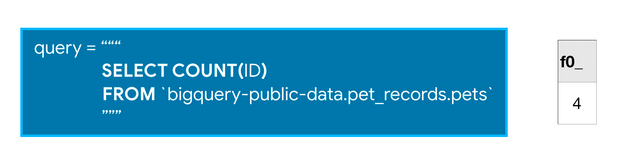

COUNT() is an example of an aggregate function, which takes many values and returns one. (Other examples of aggregate functions include SUM(), AVG(), MIN(), and MAX()) As you'll notice in the picture above, aggregate functions introduce strange column names (like f0__). Later in this course, you'll learn how to change the name to something more descriptive.


**3. GROUP BY**
GROUP BY takes the name of one or more column, and treats all rows with the same value in that column as a single group when you apply aggrgate functions like COUNT()

For example, say we ant to know how many of each type of animal we have in the pets table. We can use GROUP BY to gropu together rows that have the same value in the Animal column, while using COUNT() to find out how many ID's we have in each group

It returns a table with three rows (one for each distinct animal). We can see that the pets table contains 1 rabbit, 1 dog, and 2 cats.

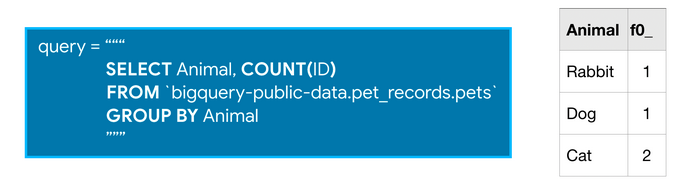


**4. GROUP BY ... HAVING**
HAVING is used in combination with GROUP BY to ignore gropus that don't meet certaing criteria.

so this query, for example, will only include groups that have more than one ID in them.

Since only one group meets the specified criterion, the query will return a table wiht only one row.

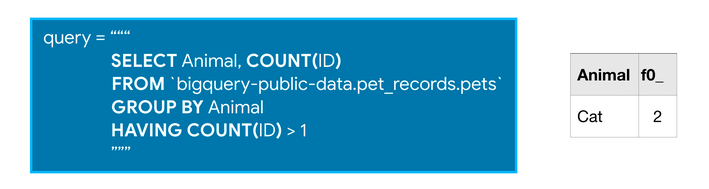

In [4]:
# Example : Which Hacker News comments generated the most discussion? 

from google.cloud import bigquery

# Create a "Client" object

client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset

dataset_ref = client.dataset("hakcer_news", project = 'bigquery-public-data')

# API request - fetch the dataset

dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table

table_ref = dataset_ref.table("comments")

# API request - fetch the table

table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table

client.list_rows(table, max_results = 5).to_dataframe()

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

Let's use the table to see which comments generated the most replies. Since :

- the parent column indicates the comment that was replied to, and 
- the id column has the unique ID used to identify each comment,

We can GROUP BY the parent column and COUNT() the id column in order to figure out the number of comments that were made as response to a sepcific comment. (This might not make sense immediately --take your time here to ensure that everything is clear!)

Furthermore, since we're only interested in popular comments, we'll look at comments with more than ten replies. So we'll only return groups HAVING more than ten ID's

In [7]:
# Query to select comments that received more than 10 replies

query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

# Set up the query (cancel the query if it would use too much of your qouta, with the limit set to 10GB)

safe_config = bigquery.QueryJobConfig(maximum_bytes_build = 10**10)
query_job = client.query(query_popular, job_config = safe_config)

# API request - run the query, and convert the results to a pandas DataFrame

popular_comments = query_job.to_dataframe()

# Print the first five orws of the DataFrame

popular_comments.head()

AttributeError: Property maximum_bytes_build is unknown for <class 'google.cloud.bigquery.job.query.QueryJobConfig'>.

**5. Aliasing and other improvements**

A couple hints to make your queries even better : 

- The column resulting from COUNT(id) was called f0__. That's not a very descriptive name. You can change the name by adding AS NumPosts after you specify the aggregation. This is called aliasing, and it will be covered in more details in an upcoming lesson.
- If you are ever unsure what to put inside the COUNT() function, you can do COUNT(1) to count the rows in each group. Most people find it especially readable, because we know it's not focusing on other columns. It also scans less data than if supplied column names (making it faster and using less of your data access quota)

In [ ]:
# Improved version of earlier query, now with aliasing & improved readability

query_imporved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10 
                 """

**6. Note on using GRUP BY**

Note that because it tells SQL how to apply aggregate functions (like COUNT()), it doesn't make sense to use GROUP BY without an aggregate function. Similary, if you have any GROUP BY clause, then all variables must be passed to either a GROUP BY command, or an aggregation function.

In [8]:
# Good using of GROUP BY

query_good = """
             SELECT parent, COUNT(id)
             FROM `bigquery-public-data.hacker_news.comments`
             GROUP BY parent
             """

# Bad using of GROUP BY

query_bad = """
            SELECT author, parent, COUNT(id)
            FROM `bigquery-public-data.hacker_news.comments`
            GROUP BY parent
            """

# Order by 

# As & With 

# Joining Data 